By using google colab code to access your webcam, capture three different facial expressions of yourself.

    A) Apply both Canny Edge Detection and Sobel Edge Detection to only the
    face area of the image using a suitable threshold values.

    B) Perform blurring of only faces in those images.

In [154]:
import numpy as np
import PIL


import io

import html
import time
import cv2
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode

In [155]:
#Google Drive is mounted
from google.colab import drive
drive.mount('/contentgdrive')

Drive already mounted at /contentgdrive; to attempt to forcibly remount, call drive.mount("/contentgdrive", force_remount=True).


In [156]:
#A path is created to read image files
path = "/contentgdrive/MyDrive/DLIVACV_workshop/FirstQuiz1621727/"

In [157]:
#Taking image
# function to convert the JavaScript object into an OpenCV image

def js_to_image(js_reply):

  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):

  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [158]:
# Taking image
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

<IPython.core.display.Javascript object>

(480, 640)
Saved to Photo0.jpg


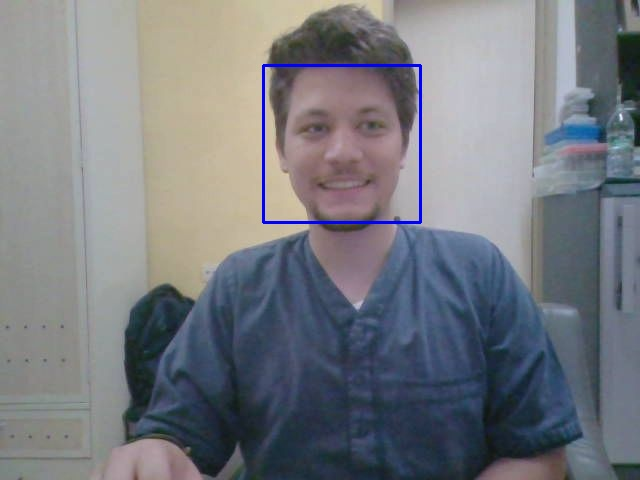

<IPython.core.display.Javascript object>

(480, 640)
Saved to Photo1.jpg


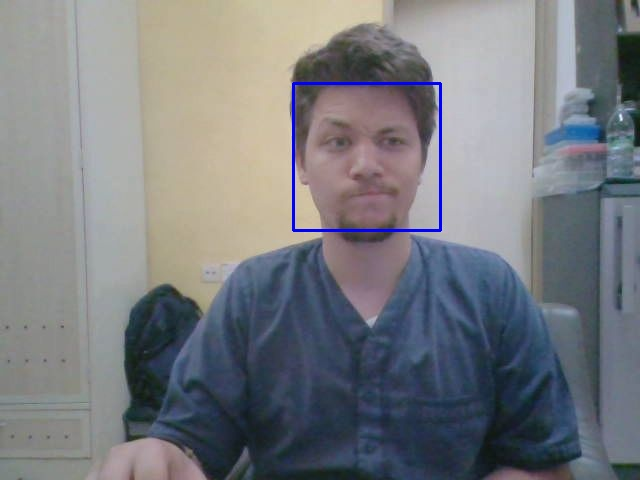

<IPython.core.display.Javascript object>

(480, 640)
Saved to Photo2.jpg


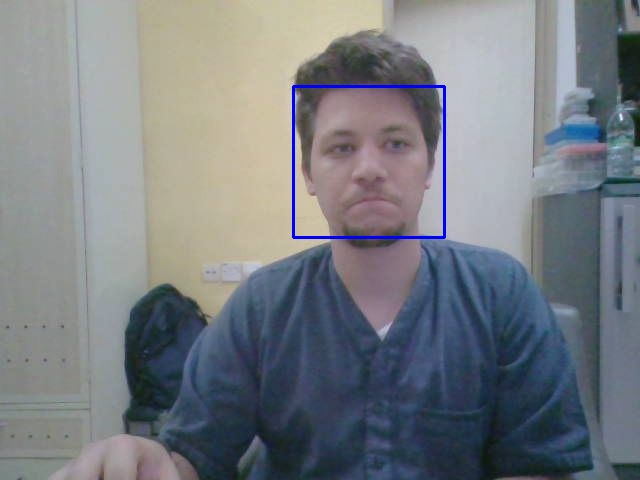

In [160]:
# Taking image

def take_photo(filename='.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

# Taking image5
x = 0
for x in range(3):
  try:
     filename = take_photo('Photo' + str(x) + '.jpg')
     print('Saved to {}'.format(filename))
      
     # Show the image which was just taken.
     display(Image(filename))
 
  except Exception as err:
     print(str(err)) 
  

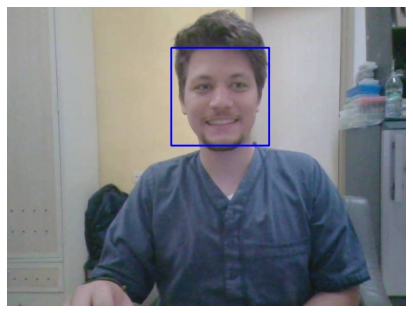

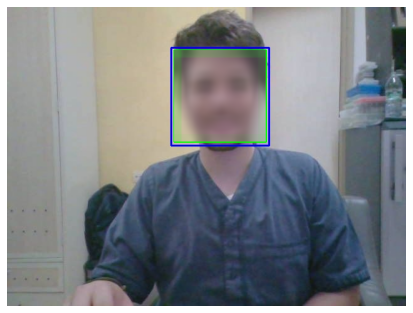

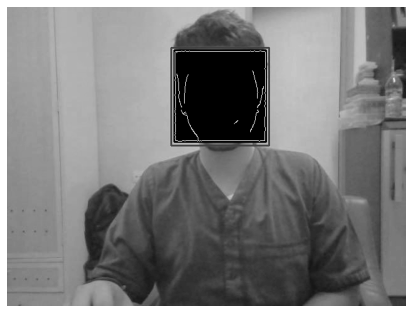

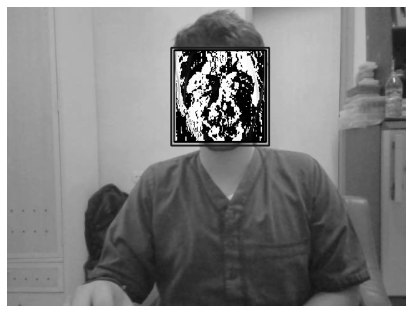

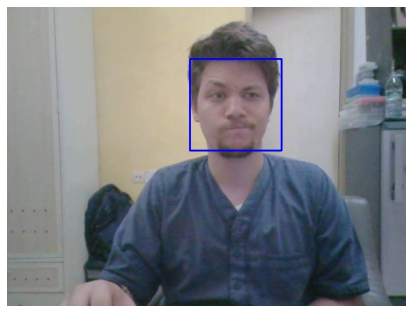

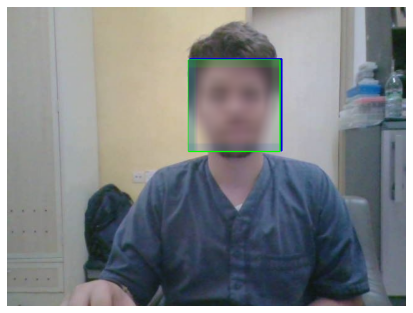

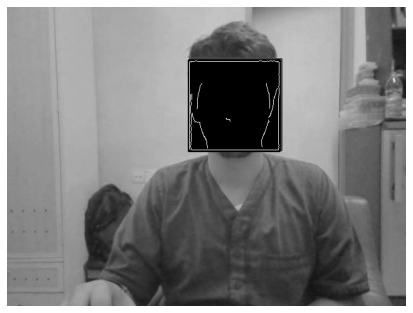

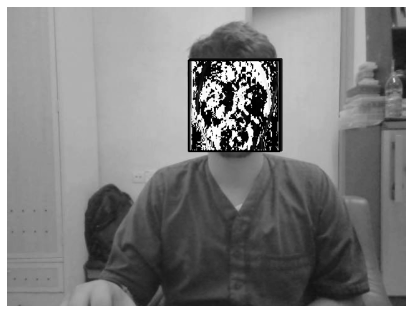

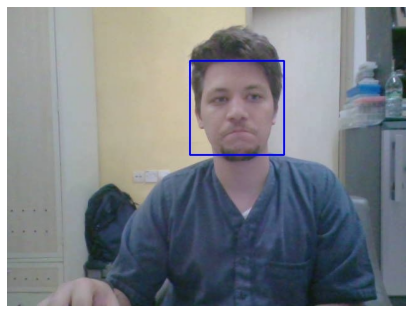

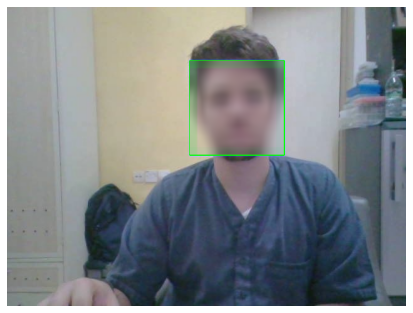

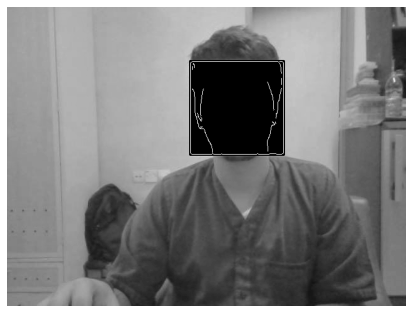

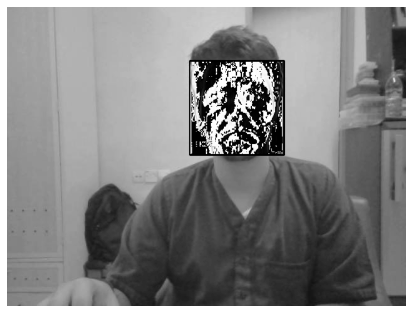

In [163]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import cv2 as cv


# A function for plotting the images
  
for x in range(3):  

  def plotImages(img):
      plt.imshow(img, cmap="gray")
      plt.axis('off')
      plt.style.use('seaborn')
      plt.show()
     
  # Reading an image using OpenCV
  # OpenCV reads images by default in BGR format
  image3 = cv2.imread('Photo' + str(x) + '.jpg')
  image4 = cv2.imread('Photo' + str(x) + '.jpg')
  image5 = cv2.imread('Photo' + str(x) + '.jpg')
  
  # Converting BGR image into a RGB image
  image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
  image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
  image5 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
  
  image4_gray = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
  image5_gray = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)

  # plotting the original image
  plotImages(image3)

  face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
  face_data  = face_detect.detectMultiScale(image3, 1.3, 5)
  face_data1 = face_detect.detectMultiScale(image4, 1.3, 5)
  face_data2 = face_detect.detectMultiScale(image4, 1.3, 5)

  # Draw rectangle around the faces which is our region of interest (ROI)
  for (x, y, w, h) in face_data:

      cv2.rectangle(image3, (x, y), (x + w, y + h), (0, 255, 0), 2)
      roi = image3[y:y+h, x:x+w]
      # applying a gaussian blur over this new rectangle area
      roi = cv2.GaussianBlur(roi, (23, 23), 30)

      # impose this blurred image on original image to get final image
      image3[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

  for (x, y, w, h) in face_data1:
      
      cv2.rectangle(image4_gray, (x, y), (x + w, y + h), (0, 255, 0), 2)
      roi1 = image4_gray[y:y+h, x:x+w]
      # applying a gaussian blur over this new rectangle area

      roi1 = cv2.Canny(roi1,100,200)
      # impose this blurred image on original image to get final image
      image4_gray[y:y+roi1.shape[0], x:x+roi1.shape[1]] = roi1

  for (x, y, w, h) in face_data2:

      cv2.rectangle(image5_gray, (x, y), (x + w, y + h), (0, 255, 0), 2)
      roi2 = image5_gray[y:y+h, x:x+w]

      roi2_blur = cv2.GaussianBlur(roi2, (1,1), 0) 
      roi2 = cv2.Sobel(src=roi2_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=1) # Combined X and Y Sobel Edge Detection


      # impose this blurred image on original image to get final image
      image5_gray[y:y+roi2.shape[0], x:x+roi2.shape[1]] = roi2

    
  # Display the output
  plotImages(image3)
  plotImages(image4_gray)
  plotImages(image5_gray)
